# **아파트 실거래가 예측 프로젝트**


## **Stage 3.	기초 EDA 및 분석 - <font color="blue">WHAT</font> 무엇이 아파트 가격에 영향을 줄까?**
<img src='http://drive.google.com/uc?export=view&id=161p7_9jSKgi7s305nEmvwriJL_c0Vkmo' /><br>

## **INTRO**
지난 스테이지 **Stage 2. 문제 및 모델링의 이해 - 아파트 실거래가를 예측하기 위해 필요한 것** 에서 변수들의 기술적 통계을 확인하고, train 및 test 데이터셋을 구성하여 선형회귀 모델을 적용해보았습니다 😀  

이번 경진대회는 외부데이터 사용이 자유로운데요,   
**기존 변수와 함께 외부데이터를 적용**하여 **더 효과적인 예측 모델**을 개발할 수 있습니다 😎


이번 스테이지는 **외부데이터를 결합**하고, **변수들의 추론적 통계**를 확인하여 다시 **선형 회귀 모델에 적용**할 예정입니다. 

그럼, 새로운 데이터와 만날 준비가 되셨을까요? 함께 가시죠! 🚙

먼저, 한글 폰트를 설정하기 위한 약간의 준비를 하겠습니다! 한글 폰트를 다운로드하고, 적용하는 코드입니다.

In [ ]:
# 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

### **1. 외부 데이터 선정 및 기존 데이터와 병합**

#### 1-1. 외부 데이터 선정
먼저, 저희가 어떤 데이터를 가지고 있는지 파악해야겠죠?    
저희는 현재 기본적으로 제공된 아파트 실거래가 데이터와 공원 정보, 어린이집 정보가 추가로 있습니다. 

여기서 학습에 사용할 컬럼 위주로 기존 데이터를 정리해봅시다!

- 아파트 실거래가 데이터(Dacon)
    - **지역(city, dong)**: 외부데이터 결합용, 서울특별시로 제한
    - **전용면적(exclusive_use_area)**
    - *완공일자(year_of_completion)*
        - **life_of_apartment**: 거래일자-완공일자로 건물의 나이를 표현
    - *거래일자(transaction_year_month,  transaction_date)*
        - **transaction_ymd**: YYYYMMDD 형식으로 변환
    - **층수(floor)**
    - **실거래가(transaction_real_price)**
- 공원 정보(Dacon)
    - *시군구명(gu)*
        - **park_number**: 자치구 공원 수
- 어린이집 정보(Dacon)
    - *시군구명(gu)*
        - **center_number**: 자치구 어린이집 수

완공일자는 연도 형식으로 그대로 사용하는 것보다 거래일자에서 완공일자를 뺀 건물의 나이로 사용하는게 좋겠군요!    
거래일자도 두 변수로 나눠져 있어서서 하나로 합쳐야겠네요 🤔    
서울특별시를 중심으로 분석하기 위해 서울특별시로 데이터를 제한하는 것도 좋겠네요~

---
다시 정리해볼까요?

- 아파트 실거래가 데이터(Dacon)
    - **지역(city, dong)**: 외부데이터 결합용, 서울특별시로 제한
    - **전용면적(exclusive_use_area)**
    - **건물나이(life_of_apartment)**
    - **거래일자(transaction_ymd)**
    - **층수(floor)**
    - **실거래가(transaction_real_price)**
- 공원 정보(Dacon)
    - **park_number**: 자치구 공원 수
- 어린이집 정보(Dacon)
    - **center_number**: 자치구 어린이집 수

좋습니다! 이제 아파트 실거래가 데이터와 공원 정보를 합쳐보기 전에 무엇이 필요한지 확인해봅시다~ 

판다스 라이브러리를 선언하고 데이터를 불러옵니다.



In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/데이크루4기_먼스크루/data/dacon/train.csv')
test = pd.read_csv('/content/drive/MyDrive/데이크루4기_먼스크루/data/dacon/test.csv')
park = pd.read_csv('/content/drive/MyDrive/데이크루4기_먼스크루/data/dacon/park.csv')
day_care_center = pd.read_csv('/content/drive/MyDrive/데이크루4기_먼스크루/data/dacon/day_care_center.csv')
submission = pd.read_csv('/content/drive/MyDrive/데이크루4기_먼스크루/data/dacon/submission.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


train 데이터와 park 데이터에서 샘플 1건씩 뽑아서 비교해봅시다.

In [ ]:
train.sample(1)

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
794925,794925,8561,부산광역시,용호동,179-9,용호동 일신 님(林)Ⅱ,용호동 179-9 용호동 일신 님(林)Ⅱ,84.975,2006,201606,1~10,5,33000


In [ ]:
park.sample(1)

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
874,서울특별시,송파구,신천동,신천어린이교통,근린공원,12755.5,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01


음... 문제가 발생한 것 같으신가요?      
구별 공원 수로 합치려고 했는데, train 데이터에는 구 데이터가 없습니다 😢    

하지만 괜찮습니다!    
동 데이터로 구를 매핑해주면 되니까요 😉    

법정동 관련 데이터는 행정안전부 홈페이지에서 쉽게 다운로드할 수 있습니다. 

[주민등록 행정구역코드 2017. 12. 26. 기준](https://www.mois.go.kr/frt/bbs/type001/commonSelectBoardArticle.do?bbsId=BBSMSTR_000000000052&nttId=61210)

또 구해야하는게 남았죠? 바로 외부데이터입니다 😯    

이번 실습에서 사용할 외부데이터는 사회 환경 요인이 포함된 데이터를 임의로 선정했는데요,   
향후 관심이 있는 데이터나 관련이 높을 것 같은 데이터를 자율적으로 추가하셔도 좋습니다 😀

이번 실습에서 사용할 외부데이터는 아래와 같습니다. 
- 한국은행 기준금리(월)
    - 기준금리
- 서울특별시 인구밀도
    - 인구밀도
- 부동산원 전세가격지수
    - 전세가격지수(jeonse)
- 국가철도공단 서울메트로
    - 자치구별 역 개수(num_station)
- 구·시·군의회의원선거(6, 7회)
    - 자치구별 정당 개수(정당_좌, 정당_우, 정당_기타)
- 서울특별시 자율고등학교(사립)
    - 학교 수(num_school)
    - 졸업자 수(num_alumni)

해당 데이터는 하이퍼링크로 추가된 사이트에서 다운받을 수 있습니다.    
실습에서는 편의를 위해 바로 사용할 수 있도록 구성하였으며,    
필요에 따라 직접 다운로드 받으셔도 좋습니다.
- [한국은행 기준금리(월)](https://ecos.bok.or.kr/#/SearchStat)
- [서울특별시 인구밀도](https://data.seoul.go.kr/dataList/10790/S/2/datasetView.do)
- [한국부동산원 전세가격지수](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1YL20171E&conn_path=I2)
- [국가철도공단 서울메트로](https://www.data.go.kr/data/15041123/fileData.do)
- [구·시·군의회의원선거(6, 7회)](http://info.nec.go.kr/electioninfo/electionInfo_report.xhtml)
- [서울특별시 자율고등학교(사립)](https://data.seoul.go.kr/dataList/10400/S/2/datasetView.do)

#### 1-2. 기존 데이터와 병합 연습

##### **Inst.**
자, 데이터를 합쳐봅시다 😃    
먼저 서울특별시 데이터만 추출해볼까요?    
1. 판다스의 value_counts()로 서울특별시와 부산광역시의 데이터 개수를 확인하고,    
2. 서울특별시 데이터만 뽑습니다.
3. 추출한 데이터를 value_counts()로 다시 확인해봐요!

##### **Hint.**
- 데이터프레임[컬럼].value_counts()는 데이터프레임의 컬럼에 존재하는 각 값이 를 출력합니다.
- 'train['city'] == '서울특별시'라는 조건은 'city' 열의 각 원소들이 '서울특별시'인지 True/False로 판별한 Series를 반환해요.
- train[조건]으로 조건에 맞는 행만 추출할 수 있습니다!

##### **Solution**
value_counts()로 데이터프레임 train의 'city' 컬럼에 각 값이 몇 번씩 등장하는지를 세어서 출력할 수 있어요.    

In [ ]:
train['city'].value_counts()

서울특별시    742285
부산광역시    474268
Name: city, dtype: int64

- train['city']는 DataFrame 'train'에서 'city' 열(column)에 해당하는 Series를 추출해요.
- train['city'] == '서울특별시'는 'city' 열의 각 원소들이 '서울특별시'인지 True/False로 판별한 Series를 반환할 수 있어요.
- train[train['city'] == '서울특별시']는 위에서 구한 True/False Series를 이용하여 DataFrame 'train'에서 조건에 맞는 행들만 추출하게 됩니다!

즉, 'city' 열의 값이 '서울특별시'인 행들만 DataFrame 'train'에서 남기고 나머지는 제거합니다.    
이를 통해 'city' 열의 값이 '서울특별시'인 데이터만을 포함하는 새로운 DataFrame을 생성할 수 있습니다~

In [ ]:
train = train[train['city']=='서울특별시']

value_counts()로 다시 확인해보니, 서울특별시 데이터만 남아있네요!

In [ ]:
train['city'].value_counts()

서울특별시    742285
Name: city, dtype: int64

이전에 train 데이터에 동 정보만 있는 것을 확인했었어요.   
동 정보로 구 정보를 추가시켜주기 위해 법정동 데이터를 불러와봅시다!

In [ ]:
# 동구 매핑
# data_dir = '/content/drive/MyDrive/데이크루4기_먼스크루/data/other/'
data_dir = 'https://raw.githubusercontent.com/0525hhgus/DaCrew4_MonthCrew/main/data/other/'

mapping_data = pd.read_csv(data_dir+'KIKcd_B.20171226.csv', encoding='utf-8')
mapping_data = mapping_data[(mapping_data['시도명'] == '서울특별시')]
mapping_data.sample(5)

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
236,1123010900,서울특별시,동대문구,휘경동,NaN,19880423,NaN
15,1111011400,서울특별시,종로구,내자동,NaN,19880423,NaN
382,1153010300,서울특별시,구로구,가리봉동,NaN,19880423,NaN
277,1129013200,서울특별시,성북구,보문동3가,NaN,19880423,NaN
295,1135000000,서울특별시,노원구,NaN,NaN,19880423,NaN


서울특별시 데이터로 잘 불러와졌네요!    


##### **Inst.**
판다스의 merge 함수는 두 개 이상의 DataFrame을 병합하는 함수입니다.   
merge 함수로 train 데이터와 법정동  데이터를 합쳐볼까요?   
1. train 데이터의 'dong'과 mapping_data 데이터의 '읍면동명' 기준으로 merge해봐요. 
2. merge를 통해 합쳐진 데이터에서 '동리명', '생성일자', '말소일자' 컬럼을 drop으로 삭제할게요.     
열을 기준으로 삭제할 때는 axis=1 옵션을 사용해줍니다.
3. 최종 데이터 중에서 5개를 랜덤으로 출력해봅시다!

##### **Hint.**
merge 함수와 파라미터에 대한 설명입니다!   
```python
merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
```
- left: 병합할 첫 번째 DataFrame
- right: 병합할 두 번째 DataFrame
- how: 병합 방식을 지정하는 문자열 ('left', 'right', 'outer', 'inner' 중 하나)
- on: 병합할 기준이 되는 열 이름, 두 DataFrame에서 공통으로 가지고 있는 열 이름
- left_on: 첫 번째 DataFrame에서 기준이 되는 열 이름
- right_on: 두 번째 DataFrame에서 기준이 되는 열 이름
- left_index: 첫 번째 DataFrame에서 인덱스를 기준으로 병합할 경우 True로 설정
- right_index: 두 번째 DataFrame에서 인덱스를 기준으로 병합할 경우 True로 설정
- sort: 병합한 결과를 열 이름으로 정렬할지 여부

실거래가 데이터에 매핑하려는 동 데이터가 많으니, LEFT 조인으로 하는게 좋겠죠?    
[SQL Joins Visualizer](https://sql-joins.leopard.in.ua/)에서 다양한 조인을 실습해볼 수 있으니, 참고해주세요!

##### **Solution**
- pd.merge(train, mapping_data, how='left', left_on='dong', right_on='읍면동명')로로 train 데이터와 mapping_data 데이터를 'dong'과 '읍면동명'이라는 컬럼을 기준으로 left join한 결과를 df_dong_gu에 저장합니다.    
- .drop(['동리명', '생성일자', '말소일자'], axis=1)로 mapping_data 데이터의 불필요한 컬럼을 제거하고,
- sample() 함수를 사용하여 df_dong_gu 데이터에서 임의의 5개 데이터를 출력합니다.

In [ ]:
df_dong_gu = pd.merge(train, mapping_data, how='left', left_on='dong', right_on='읍면동명').drop(['동리명', '생성일자', '말소일자'], axis=1)
df_dong_gu.sample(5)

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,법정동코드,시도명,시군구명,읍면동명
555372,537669,8689,서울특별시,일원동,615,우성7,일원동 615 우성7,68.40,1987,201012,1~10,3,64000,1168011400,서울특별시,강남구,일원동
177539,177539,3329,서울특별시,상계동,1285,동아불암,상계동 1285 동아불암,59.40,1999,200802,11~20,15,25000,1135010500,서울특별시,노원구,상계동
342394,328411,4397,서울특별시,신정동,311,목동신시가지10,신정동 311 목동신시가지10,53.82,1988,201507,11~20,13,42500,1147010100,서울특별시,양천구,신정동
479926,462371,9175,서울특별시,사당동,1156,이너스내안애,사당동 1156 이너스내안애,84.97,2012,201502,1~10,9,44000,1159010700,서울특별시,동작구,사당동
456471,438916,7212,서울특별시,신길동,4938,신길동자이,신길동 4938 신길동자이,84.94,2011,201504,21~30,16,49000,1156013200,서울특별시,영등포구,신길동


구까지 완벽하게 들어간 데이터가 되었네요!    
이제 공원 데이터를 train 데이터와 합칠 수 있겠어요.

구 매핑이 완료 train 데이터를 df_train_park로 복사합니다.

In [ ]:
df_train_park = df_dong_gu.copy()

자치구별 공원 수가 어떻게 되는지 확인해볼까요?

In [ ]:
park['gu'].value_counts()

강서구     148
송파구     147
강남구     132
서초구     107
은평구      79
북구       72
서대문구     50
구로구      47
동작구      46
해운대구     46
동래구      45
동대문구     41
남구       38
사하구      32
용산구      32
금정구      31
사상구      30
부산진구     30
성동구      23
강동구      23
관악구      21
연제구      20
중구       16
수영구      14
영도구      14
광진구      11
중랑구      11
서구       11
금천구      10
강북구       9
영등포구      8
종로구       5
노원구       2
도봉구       2
동구        2
양천구       1
Name: gu, dtype: int64

구한 자치구별 공원 데이터를 조회하기 쉽게 데이터프레임 형태로 변환합니다.   
구가 index로 지정되어 있으니, reset_index()를 통해 컬럼으로 만들어주고, 컬럼명을 지정해줍니다.

In [ ]:
park_temp = park['gu'].value_counts()
park_number = pd.DataFrame(park_temp)
park_number.reset_index(inplace=True)
park_number.columns = ['구','number']
park_number

,구,number
0,강서구,148
1,송파구,147
2,강남구,132
3,서초구,107
4,은평구,79
5,북구,72
6,서대문구,50
7,구로구,47
8,동작구,46
9,해운대구,46


자세히 보니 마포구와 성북구가 빠져있네요 😢    
이렇게 찾기 힘든 결측치도 종종 있어서 꼼꼼히 봐주셔야해요!   
임의로 마포구와 성복구의 데이터프레임을 만들고, append() 함수로 합쳐줍니다.

In [ ]:
df_park_gu = pd.DataFrame({'구' : ['마포구', '성북구'], 'number' : ['193', '226']})
park_number = park_number.append(df_park_gu, ignore_index = True)
park_number

,구,number
0,강서구,148
1,송파구,147
2,강남구,132
3,서초구,107
4,은평구,79
5,북구,72
6,서대문구,50
7,구로구,47
8,동작구,46
9,해운대구,46


데이터가 잘 추가되었네요!

number 컬럼을 int형으로 바꾸고, 구 컬럼을 인덱스를 설정해볼까요?

In [ ]:
park_number['number'] = park_number['number'].astype(int) 
park_number.set_index('구', inplace=True)
park_number

,number
구,
강서구,148
송파구,147
강남구,132
서초구,107
은평구,79
북구,72
서대문구,50
구로구,47
동작구,46


##### **Inst.**
자치구별 공원 수 데이터와 train 데이터를 합칠 대망의 시간입니다!    
판다스의 apply 함수와 lambda 함수를 사용해서 쉽게 합칠 수 있는데요, 한 번 해보실까요?    
1. 함수 park_number_find(x)를 정의해요.
    - 함수의 인자 x는 데이터프레임 df_train_park의 한 행(row)을 의미합니다!
    - 변수 position에 x의 시군구명 컬럼의 값을 저장하고요, 
    - park_number 데이터프레임에서 position과 일치하는 시군구명의 number 값을 반환할 수 있어요.
2. df_train_park 데이터프레임에 park_number 컬럼을 추가할게요.
    - apply 함수를 사용하여 park_number_find 함수를 axis=1로 적용하면 됩니다. 
    - 즉, 데이터프레임의 각 행(row)에 대해 함수를 적용한다고 볼 수 있겠죠?



##### **Hint.**
- Pandas의 apply 함수는 DataFrame의 행(row) 단위로 특정 함수를 적용하는 함수입니다. 
    - apply 함수는 함수를 매개변수로 받으며, DataFrame의 각 행에서 해당 함수를 호출하여 결과값을 반환합니다. 
    - 이렇게 반환된 결과값을 이용하여 DataFrame을 업데이트하거나 새로운 열(column)을 추가할 수 있습니다.

- lambda 함수는 이름이 없고 일회성으로 사용되는 함수입니다. 
    - lambda 함수는 한 줄의 코드를 이용하여 함수를 표현하며, 간단한 연산을 수행할 때 주로 사용됩니다. 
    - 일반적으로 lambda 함수는 apply 함수와 함께 사용되어, 함수를 정의하지 않고도 간단한 함수 기능을 수행할 수 있습니다.

apply 함수와 lambda 함수를 함께 사용하면, 간단한 함수를 작성하고 DataFrame에 적용할 수 있습니다.     
이를 통해 DataFrame의 값을 빠르게 변환하거나, 새로운 열을 추가할 수 있습니다.

##### **Solution**
park_number_find는 df_train_park 데이터프레임의 각 행에 대해서 시군구명 정보를 추출하고,    
해당 지역의 공원 갯수를 park_number 데이터프레임에서 찾는 함수입니다.

In [ ]:
def park_number_find(x):
    position = x['시군구명']
    return park_number.loc[position]['number']

df_train_park 데이터프레임에 park_number 컬럼을 추가하며, 이를 구하기 위해 apply함수를 사용합니다.    
apply 함수는 park_number_find 함수를 axis=1 옵션을 주어 각 행마다 적용할게요.

In [ ]:
df_train_park['park_number'] = df_train_park.apply(park_number_find, axis=1)

또, 함수를 사용하지 않고도 값을 변환할 수 있는데요, 아래 코드를 참고해주세요!    

- 'lambda x: park_number.loc[x]['number']'는 'df_train_park' 데이터프레임의 '시군구명' 칼럼의 값을 x로 받아 'park_number' 데이터프레임에서 해당 x에 해당하는 'number' 값을 찾아서 반환하는 익명 함수입니다.

- 'apply' 함수는 해당 함수를 데이터프레임의 각 행(axis=1)에 적용하여 새로운 값을 반환해요

따라서 'df_train_park' 데이터프레임의 각 행의 '시군구명' 값을 익명 함수에 적용한 결과를 'park_number' 칼럼에 저장하게 됩니다!

In [ ]:
df_train_park['park_number'] = df_train_park['시군구명'].apply(lambda x: park_number.loc[x]['number'])

샘플 하나를 추출해서 병합이 잘 되었는지 확인해볼까요?

In [ ]:
df_train_park.sample(1)

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,법정동코드,시도명,시군구명,읍면동명,park_number
631489,613453,7319,서울특별시,둔촌동,555,신동아파밀리에,둔촌동 555 신동아파밀리에,59.4,2002,200801,21~31,2,28700,1174010600,서울특별시,강동구,둔촌동,23


데이터 병합 연습이 끝났습니다!
본격적으로 실습해봅시다~

#### 1-3. 기존 데이터와 병합 실전
이번 파트에서는 여러 개의 외부데이터를 병합하게 되는데요,    
한 번에 많은 데이터를 병합해야해서 함수로 준비해봤습니다!    
병합 시간은 20~30분 정도 걸리니, 여유롭게 코드를 확인하시고 지켜봐주세요 😉

##### 1-3-1. 외부데이터 불러오기

문자와 숫자로 이루어진 데이터가 있어서, 해당 데이터를 분류하기 위해 re 모듈을 사용했습니다.    
해당 모듈을 꼭 임포트해주세요!    
load_other_data() 함수는 데이터를 다운로드하는 함수입니다~
외부데이터를 전처리하는 방법은 데이터에 따라 매우 상이합니다.    
판다스의 replace 함수와 lambda 함수 등을 사용하여 다양하게 전처리할 수 있으니, 참고해주세요!

In [ ]:
import re

In [ ]:
# 외부데이터 데이터 폴더 경로
data_dir = 'https://raw.githubusercontent.com/0525hhgus/DaCrew4_MonthCrew/main/data/other/'

def load_other_data(data_dir):

    # 법정동 데이터
    mapping_data = pd.read_csv(data_dir+'KIKcd_B.20171226.csv', encoding='utf-8')
    mapping_data = mapping_data[mapping_data['시도명'] == '서울특별시']

    # 인구 밀도 데이터
    population = pd.read_csv(data_dir+'population_20230210205933.csv', encoding='utf-8').drop(['항목', '합계'], axis=1)
    population.set_index('시점', inplace=True)

    # 한국은행 기준금리 데이터
    df_ir = pd.read_csv(data_dir+'KORBANK_200801-202212.csv')
    df_ir['변환'].replace('/', '', regex=True, inplace=True)
    df_ir['변환'] = df_ir['변환'].astype('int')
    df_ir.set_index('변환', inplace=True)

    # 구시군의회의원선거 데이터
    party_2010 = pd.read_excel(data_dir+"party/6_vote_party_seoul.xlsx", engine = "openpyxl")
    party_2014 = pd.read_excel(data_dir+"party/7_vote_party_seoul.xlsx", engine = "openpyxl")

    party_2010.columns = ['구시군명', '선거구명', '총당선인수', '새누리당',
                            '새정치민주연합', 'Unnamed: 5', '통합진보당', '정의당', '노동당',
                            '무소속']
    party_2014.columns = ['구시군명', '선거구명', '총당선인수', '더불어민주당',
                            '자유한국당', 'Unnamed: 5', '바른미래당', '민주평화당', '정의당',
                            '민중당', '무소속']

    party_2010 = party_2010[['구시군명', '총당선인수', '새누리당', '새정치민주연합', '통합진보당', '정의당', '노동당','무소속']][5:]
    party_2014 = party_2014[['구시군명', '총당선인수', '자유한국당', '더불어민주당', '바른미래당', '민주평화당', '정의당','민중당', '무소속']][5:]

    party_2010 = party_2010[party_2010['구시군명']!='  '].replace(' ', '', regex=True)
    party_2014 = party_2014[party_2014['구시군명']!='  '].replace(' ', '', regex=True)

    party_2010.set_index('구시군명', inplace=True)
    party_2014.set_index('구시군명', inplace=True)

    party_2010 = party_2010.astype('int')
    party_2014 = party_2014.astype('int')

    # 전세 가격지수 데이터
    jeonse = pd.read_csv(data_dir+'jeonse_200801-202212.csv', encoding='cp949').drop(['항목', '단위'], axis=1)[:26] 
    raw_col = jeonse.columns
    jeonse.columns = [raw_col[0]] + [ int(re.sub(r"[^0-9]", "", col)) for col in raw_col[1:] ]
    jeonse.set_index('행정구역별', inplace=True)

    # 역세권-서울지하철 데이터
    station = pd.read_csv(data_dir+'subway_seoul.csv', encoding='cp949')
    station = station[station['지번주소'].str.contains('서울특별시')]
    station["구"] = station["지번주소"].apply(lambda x: x.split()[1])

    # 자율형사립고 데이터
    school = pd.read_csv(data_dir+'school_20230210225031.csv')[1:]
    school = school.replace('-', 0)
    school = school.astype('int')
    school.set_index('시점', inplace=True)

    return mapping_data, population, df_ir, party_2010, party_2014, jeonse, station, school

In [ ]:
mapping_data, population, df_ir, party_2010, party_2014, jeonse, station, school = load_other_data(data_dir)

##### 1-2-2. 외부데이터 병합하기

mapping_other_data() 함수로 전체 외부데이터를 병합할 수 있습니다.    
연습 때 사용했던 판다스의 merge() 함수와 lambda 함수가 사용되니, 자세히 살펴봐주세요! 

In [ ]:
def mapping_other_data(df): # df는 train 또는 test 데이터 입력
    # 서울특별시 데이터만 추출
    df = df[df['city'] == '서울특별시']

    # 법정동 매핑
    print("[START] 법정동 매핑")
    df = pd.merge(df, mapping_data, how='left', left_on='dong', right_on='읍면동명').drop(['동리명', '생성일자', '말소일자'], axis=1)
    print("[END] 법정동 매핑")
    

    # 인구밀도 매핑
    print("[START] 인구밀도 매핑")
    def mapping_year_gu_population(x):
        year = x['transaction_year_month']//100
        return population[x['시군구명']].loc[year]
    
    df['인구밀도'] = df.apply(mapping_year_gu_population, axis=1)
    print("[END] 인구밀도 매핑")

    # 한국은행 기준금리 매핑
    print("[START] 기준금리 매핑")
    df['기준금리'] = df['transaction_year_month'].apply(lambda x: df_ir.loc[x, :][0])
    print("[END] 기준금리 매핑")

    # 구시군의회의원선거 매핑
    print("[START] 구시군의회의원선거 매핑")
    def mapping_year_gu_party(x):            
        # 우, 좌, 기타
        if x['transaction_year_month'] < 2014:
            return [ party_2010.loc[x['시군구명']]['새누리당'], party_2010.loc[x['시군구명']]['새정치민주연합'], sum(party_2010.loc[x['시군구명']][2:])]
        else:
            return [ party_2014.loc[x['시군구명']]['자유한국당'], party_2014.loc[x['시군구명']]['더불어민주당'], sum(party_2014.loc[x['시군구명']][2:])]

    df_party = pd.DataFrame(list(df.apply(mapping_year_gu_party, axis=1)), columns=['정당_우', '정당_좌', '정당_기타'])
    df = pd.concat([df,df_party], axis=1)
    print("[END] 구시군의회의원선거 매핑")

    # 전세 가격지수 매핑
    print("[START] 전세가격지수 매핑")
    def mapping_year_month_gu_jeonse(x):
        year = x['transaction_year_month']
        return jeonse.loc[x['시군구명']][year]

    df['jeonse'] = df.apply(mapping_year_month_gu_jeonse, axis=1)
    print("[END] 전세가격지수 매핑")

    # 역세권(지하철 역 개수) 매핑
    print("[START] 지하철 데이터 매핑")
    num_station = station["구"].value_counts()
    df['num_station'] = df["시군구명"].apply(lambda x: num_station[x])
    print("[END] 지하철 데이터 매핑")

    # 자율형사립고 데이터 매핑
    print("[START] 자율형사립고 데이터 매핑")
    def mapping_year_gu_school(x):
        year = 2011 if x['transaction_year_month']//100 < 2011 else x['transaction_year_month']//100 
        return school.loc[year][x['시군구명']]
    def mapping_year_gu_alumni(x):
        year = 2011 if x['transaction_year_month']//100 < 2011 else x['transaction_year_month']//100 
        return school.loc[year][x['시군구명']+'.1']

    df['num_school'] = df.apply(mapping_year_gu_school, axis=1)
    df['num_alumni'] = df.apply(mapping_year_gu_alumni, axis=1)
    print("[END] 자율형사립고 데이터 매핑")

    # 공원 데이터 매핑
    print("[START] 공원 데이터 매핑")
    park_new= park[park['city']=='서울특별시']
    park_temp = park_new['gu'].value_counts()
    park_number = pd.DataFrame(park_temp)
    park_number.reset_index(inplace=True)
    park_number.columns = ['구','number']

    df_park_gu = pd.DataFrame({'구' : ['마포구', '성북구'], 'number' : ['193', '226']})
    park_number= park_number.append(df_park_gu, ignore_index = True)

    park_number['number'] = park_number['number'].astype(int) 
    park_number.set_index('구', inplace=True)
    
    def park_number_find(a):
        position = a['시군구명']
        return park_number.loc[position]['number']
        
    df['park_number'] = df.apply(park_number_find,axis=1)
    print("[END] 공원 데이터 매핑")

    # 어린이집 데이터 매핑
    print("[START] 어린이집 데이터 매핑")
    center_new= day_care_center[day_care_center['city']=='서울특별시']
    center_temp = center_new['gu'].value_counts()
    center_number = pd.DataFrame(center_temp)
    center_number.rename(columns={'gu':'number'})

    center_number.reset_index(inplace=True)
    center_number.columns = ['시군구명' ,'number']

    df_center_gu = pd.DataFrame({'시군구명' : ['용산구', '성북구','마포구','동대문구'], 'number' : ['36', '87','85','77']})
    center_number= center_number.append(df_center_gu, ignore_index = True)
    center_number.set_index('시군구명', inplace=True)

    def center_number_find(a):
        position = a['시군구명']
        return center_number.loc[position]['number']

    df['center_number'] = df.apply(center_number_find,axis=1)
    print("[END] 어린이집 데이터 매핑")
    
    # 날짜 전처리(기간의 평균 -> 연월일)
    def generate_data(x):
        day = str(sum(map(int, x['transaction_date'].split('~')))//2)
        day = '0'+day if len(day) == 1 else day
        year_month = str(x['transaction_year_month'])
        return int(year_month+day)
    df['transaction_ymd'] = df.apply(generate_data, axis=1)

    # 건물연수=거래일자-완공일자
    def old_apartment(x):
        return x['transaction_year_month']//100-x['year_of_completion']
    df['life_of_apartment'] = df.apply(old_apartment, axis=1)

    return df

In [ ]:
df_train = mapping_other_data(train)

[START] 법정동 매핑
[END] 법정동 매핑
[START] 인구밀도 매핑
[END] 인구밀도 매핑
[START] 기준금리 매핑
[END] 기준금리 매핑
[START] 구시군의회의원선거 매핑
[END] 구시군의회의원선거 매핑
[START] 전세가격지수 매핑
[END] 전세가격지수 매핑
[START] 지하철 데이터 매핑
[END] 지하철 데이터 매핑
[START] 자율형사립고 데이터 매핑
[END] 자율형사립고 데이터 매핑
[START] 공원 데이터 매핑
[END] 공원 데이터 매핑
[START] 어린이집 데이터 매핑
[END] 어린이집 데이터 매핑


In [ ]:
df_test = mapping_other_data(test)

[START] 법정동 매핑
[END] 법정동 매핑
[START] 인구밀도 매핑
[END] 인구밀도 매핑
[START] 기준금리 매핑
[END] 기준금리 매핑
[START] 구시군의회의원선거 매핑
[END] 구시군의회의원선거 매핑
[START] 전세가격지수 매핑
[END] 전세가격지수 매핑
[START] 지하철 데이터 매핑
[END] 지하철 데이터 매핑
[START] 자율형사립고 데이터 매핑
[END] 자율형사립고 데이터 매핑
[START] 공원 데이터 매핑
[END] 공원 데이터 매핑
[START] 어린이집 데이터 매핑
[END] 어린이집 데이터 매핑


데이터 병합이 모두 완료되었네요!    
이제 병합된 데이터를 살펴볼까요?

In [ ]:
df_train

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,...,정당_좌,정당_기타,jeonse,num_station,num_school,num_alumni,park_number,center_number,transaction_ymd,life_of_apartment
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,...,7,7,62.175705,15,2,797,5,78,20080126,6
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,...,7,7,62.175705,15,2,797,5,78,20080105,35
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,...,7,7,62.175705,15,2,797,5,78,20080105,1
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,...,7,7,62.175705,15,2,797,5,78,20080115,5
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,...,7,7,62.175705,15,2,797,5,78,20080126,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762587,1196844,996,서울특별시,강일동,717,고덕리엔파크2단지,강일동 717 고덕리엔파크2단지,59.72,2011,201711,...,10,10,97.595844,12,1,347,23,272,20171115,6
762588,1196846,682,서울특별시,강일동,674,강일리버파크3단지,강일동 674 강일리버파크3단지,59.87,2009,201711,...,10,10,97.595844,12,1,347,23,272,20171125,8
762589,1196847,682,서울특별시,강일동,674,강일리버파크3단지,강일동 674 강일리버파크3단지,84.74,2009,201711,...,10,10,97.595844,12,1,347,23,272,20171125,8
762590,1196848,680,서울특별시,강일동,665,강일리버파크1단지,강일동 665 강일리버파크1단지,84.74,2009,201711,...,10,10,97.595844,12,1,347,23,272,20171125,8


원하는 변수로 잘 병합되었습니다.    
자세히보니 사용하지 않을 컬럼이 몇개 보이네요!    
사용하지 않는 컬럼은 지우도록 하겠습니다~

In [ ]:
drop_columns =['transaction_id', 'transaction_date', 'year_of_completion', 'transaction_year_month', 'apartment_id', 'city', 'jibun', 'apt','addr_kr','시도명', '읍면동명', '법정동코드']
df_train.drop(drop_columns, axis=1,inplace=True)
df_test.drop(drop_columns, axis=1,inplace=True)

오래 기다려서 만들었는데, 데이터가 날아가면 많이 아쉽겠죠..? 🥺    
csv로 데이터를 저장해줍시다!

In [ ]:
df_train.to_csv('/content/drive/MyDrive/데이크루4기_먼스크루/data/data+other/train_with_other_data.csv', index=False)
df_test.to_csv('/content/drive/MyDrive/데이크루4기_먼스크루/data/data+other/test_with_other_data.csv', index=False)

저장한 데이터를 다시 불러와봅시다!

In [ ]:
# 외부데이터 결합한 데이터
df_train = pd.read_csv('/content/drive/MyDrive/데이크루4기_먼스크루/data/data+other/train_with_other_data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/데이크루4기_먼스크루/data/data+other/test_with_other_data.csv')

### **2. 변수의 추론적 통계 분석**

이제 병합한 데이터로 추론적 통계를 분석해봅시다!

#### 2-1. 상관관계 분석
대표적인 추론적 통계 방법으로 상관관계 분석을 수행할 수 있어요!    
상관관계는 2개의 변수가 선형 관계가 있는 범위를 표현하는 통계적 측도로 말해요 😀    
0에 가까우면 선형 관계가 거의 없다고 볼 수 있고,    
1에 가까우면 양의 선형 관계, -1에 가까우면 음의 선형 관계가 있다고 볼 수 있어요!

변수들의 상관관계를 확인하러 가보실까요?

이후에 상관관계 시각화에 사용할 seaborn 과 matplotlib 라이브러리를 미리 임포트해줍시다. 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

상관관계에서 사용하지 않을 변수는 지우도록 하겠습니다!

In [ ]:
df_train = df_train.drop(['transaction_ymd', 'dong', '시군구명'], axis=1)
df_test = df_test.drop(['transaction_ymd', 'dong', '시군구명'], axis=1)

상관관계를 확인할 변수를 cont_col로 선언해줍니다.

In [ ]:
cont_col = ['exclusive_use_area', 'floor', 'life_of_apartment',
       'transaction_real_price', '인구밀도', '기준금리', '정당_우', '정당_좌', '정당_기타',
       'jeonse', 'num_station', 'num_school', 'num_alumni', 'park_number',
       'center_number']

##### **Inst.**
판다스의 corr() 함수로 변수 간의 상관관계를 확인할 수 있습니다~

corr() 함수는 데이터프레임의 열 간 상관 관계를 계산하여 상관 행렬(Correlation Matrix)을 반환하는 함수입니다.     

corr() 함수는 기본적으로 Pearson 상관 계수를 사용하여 상관 행렬을 계산해요.    이외에도, Kendall 상관 계수나 Spearman 상관 계수 등 다양한 상관 계수를 사용할 수 있어요.    
또한, DataFrame의 행과 열의 이름을 사용하여 특정 열 간의 상관 관계만 계산할 수도 있답니다.

상관 행렬은 데이터프레임에서 변수 간의 관계를 파악하거나, 변수 선택에 대한 기준을 제공하는 등 다양한 분석에 활용되니, 유용하겠죠?

이제, 변수들의 상관관계를 확인해볼까요?    

##### **Hint.**
판다스의 corr() 함수는 아래 파라미터를 가지고 있어요.   
```python
corr(method='pearson', min_periods=1)
```
- method : {'pearson', 'kendall', 'spearman'}, 기본값은 'pearson'입니다. 상관 계수를 계산할 때 사용할 상관 계수의 종류를 선택합니다. 'pearson'은 피어슨 상관 계수를 사용하며, 'kendall'은 켄달의 타우 상관 계수, 'spearman'은 스피어맨 상관 계수를 사용합니다.
- min_periods : int, 기본값은 1입니다. 상관 계수를 계산할 때 사용할 최소 데이터 개수를 지정합니다. 이 값보다 적은 데이터가 있는 경우, 해당 열은 NaN으로 반환됩니다.

##### **Solution**
df_train[cont_col].corr()로 cont_col 변수에 저장된 연속형 변수들 간의 상관관계를 계산할 수 있어요.   
이때, 데이터 정규화는 자동으로 이루어지니 걱정하지 않으셔도 됩니다.

In [ ]:
df_train[cont_col].corr()

,exclusive_use_area,floor,life_of_apartment,transaction_real_price,인구밀도,기준금리,정당_우,정당_좌,정당_기타,jeonse,num_station,num_school,num_alumni,park_number,center_number
exclusive_use_area,1.000000,0.103213,-0.103886,0.668721,-0.069823,-0.049038,0.024000,-0.081210,-0.078852,0.040871,0.068979,0.139861,0.126749,0.094736,-0.117515
floor,0.103213,1.000000,-0.177953,0.141762,0.030223,-0.028400,-0.001608,-0.043034,-0.032518,0.023829,0.001204,-0.030026,-0.034807,0.016568,-0.059608
life_of_apartment,-0.103886,-0.177953,1.000000,0.045172,-0.080426,-0.190006,0.107247,-0.027782,-0.011178,0.233366,0.080470,-0.007222,0.009378,-0.091419,0.079450
transaction_real_price,0.668721,0.141762,0.045172,1.000000,-0.221540,-0.138458,0.258052,-0.082203,-0.078672,0.116803,0.325297,0.363723,0.369851,0.242310,-0.135667
인구밀도,-0.069823,0.030223,-0.080426,-0.221540,1.000000,0.048607,0.103980,0.080597,-0.008399,-0.090269,-0.312847,-0.055794,-0.101461,-0.241743,-0.098931
기준금리,-0.049038,-0.028400,-0.190006,-0.138458,0.048607,1.000000,-0.015122,0.005570,0.006183,-0.689402,-0.029106,0.046936,0.119288,-0.015925,0.008824
정당_우,0.024000,-0.001608,0.107247,0.258052,0.103980,-0.015122,1.000000,0.230715,0.023119,-0.018920,0.576246,0.233668,0.273051,0.578275,0.180521
정당_좌,-0.081210,-0.043034,-0.027782,-0.082203,0.080597,0.005570,0.230715,1.000000,0.923329,-0.060188,0.281420,-0.056696,-0.067563,0.315368,0.478086
정당_기타,-0.078852,-0.032518,-0.011178,-0.078672,-0.008399,0.006183,0.023119,0.923329,1.000000,-0.071961,0.146252,-0.059495,-0.061107,0.195283,0.418283
jeonse,0.040871,0.023829,0.233366,0.116803,-0.090269,-0.689402,-0.018920,-0.060188,-0.071961,1.000000,-0.019043,-0.060878,-0.152432,-0.048655,-0.046826


여러 개씩 보니 감이 잘 안잡히네요 🤔    
실거래가 변수에 대한 상관관계를 확인해볼까요?    
판다스의 sort_values() 함수와 lambda 함수를 사용하여 절대값 내림차순으로 확인해봅시다!

In [ ]:
df_train[cont_col].corr()['transaction_real_price'].sort_values(key=lambda x: abs(x), ascending=False)

transaction_real_price    1.000000
exclusive_use_area        0.668721
num_alumni                0.369851
num_school                0.363723
num_station               0.325297
정당_우                      0.258052
park_number               0.242310
인구밀도                     -0.221540
floor                     0.141762
기준금리                     -0.138458
center_number            -0.135667
jeonse                    0.116803
정당_좌                     -0.082203
정당_기타                    -0.078672
life_of_apartment         0.045172
Name: transaction_real_price, dtype: float64

전용면적과 졸업생 수, 학교 수, 지하철 수가 양의 상관관계를 보여주네요!    
인구밀도와는 음의 상관관계를 보여주고 있네요.

seaborn 라이브러리의 heatmap을 사용하여 시각적으로 상관관계를 표현할 수 있습니다~ 

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


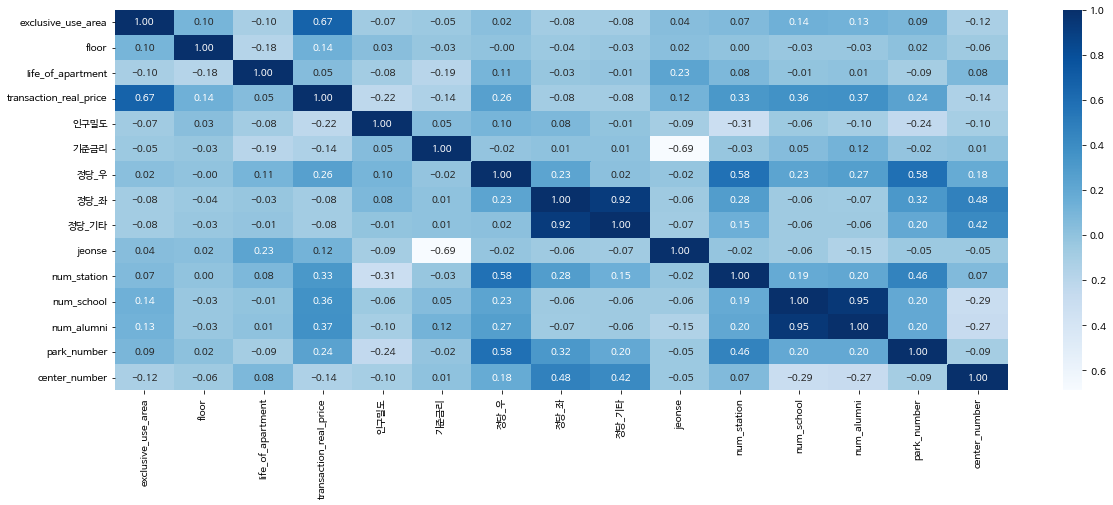

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(df_train[cont_col].corr(), annot=True, fmt=".2f", cmap="Blues")

다른 변수 간의 관계까지 훨씬 눈에 잘 들어오네요!

#### 2-2. 통계적 유의성
통계 모델에서  P>|t| 가 0.05 보다 작으면 통계적으로 의미있다고 합니다 😎    
어떤 변수가 통계적으로 유의미한지 알아볼까요?

통계 라이브러리인 statsmodels와 train, test 데이터셋 분리를 위한 train_test_split 라이브러리를 임포트합니다.

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split( df_train.drop('transaction_real_price', axis=1), df_train['transaction_real_price'], test_size=0.2, random_state=42)

add_constant() 함수로 상수항을 추가해주고, OLS(종속변수, 독립변수).fit()으로 모델을 학습시켜봅시다!

In [ ]:
train_X_const = sm.add_constant(train_X)

model = sm.OLS(train_Y, train_X_const).fit()
print(model.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                              OLS Regression Results                              
Dep. Variable:     transaction_real_price   R-squared:                       0.639
Model:                                OLS   Adj. R-squared:                  0.639
Method:                     Least Squares   F-statistic:                 7.716e+04
Date:                    Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                            14:25:00   Log-Likelihood:            -6.9140e+06
No. Observations:                  610073   AIC:                         1.383e+07
Df Residuals:                      610058   BIC:                         1.383e+07
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

P>|t|가 0.001 이하인 것으로 보아, 전반적으로 유의미한 변수를 가지고 있다고 볼 수 있겠네요!


### **3. 기초 모델링: 선형 회귀**
외부데이터를 추가한 데이터로 다시 선형 회귀를 학습해봅시다!

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lrmodel = LinearRegression()
lrmodel.fit(train_X, train_Y)

LinearRegression()

In [ ]:
# RSME 성능평가 계산을 위한 라이브러리
from sklearn.metrics import mean_squared_error

def RMSE(y, y_pred):
    rmse = mean_squared_error(y, y_pred) ** 0.5
    return rmse

In [ ]:
print(RMSE(lrmodel.predict(train_X), train_Y))
print(RMSE(lrmodel.predict(test_X), test_Y))

20214.414720304118
20196.695866782058


Stage 2에서 24762.41의 점수를 얻었는데, Stage 3은 20196.70으로 성능이 많이 좋아졌네요!    
외부데이터를 추가해서 예측에 많은 도움이 된 것 같아요 😀   

<img src='http://drive.google.com/uc?export=view&id=1JK2pmCr_1dguByU2R-YRBbxRzM5PoI_f' /><br>
다음 스테이지는 **Stage 4.  EDA 기반 시각화 및 가공 - <font color="blue">WHERE</font>  어디서 아파트 가격이 잘 나타날까?** 입니다!    
변수별 특징을 시각화하고, 다양한 전처리와 모델링을 수행할 예정이에요~    
그럼, 다음 스테이지로 가볼까요? 😎